# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Ma. Ezthelia Kaye B. Camit \
_Student No._:2020-06594\
_Section_:THY-TX1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MA. EZTHELIA KAYE B. CAMIT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import community as community_louvain

In [3]:
nx.__version__

'3.2.1'

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

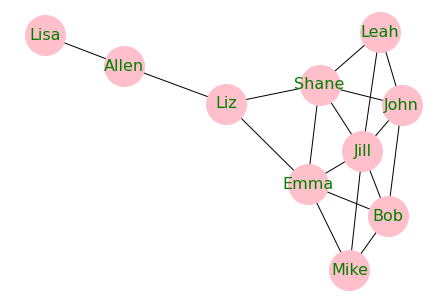

In [4]:
Friends= nx.Graph()
Friends.add_node('Jill')

nodes_to_add = ['Mike', 'Bob', 'John', 'Leah', 'Shane', 'Emma', 'Liz', 'Allen', 'Lisa']
Friends.add_nodes_from(nodes_to_add)

Friends.add_edge('Jill','Mike')
edges_to_add = [('Jill','Bob'),('Jill','Emma'),('Jill','John'),
               ('Jill','Leah'),('Jill','Shane'),('Mike','Bob'),
                ('Mike','Emma'),('Bob','John'),('Bob','Emma'),
                ('Emma','Shane'),('John','Shane'),('John','Leah'),
                ('Leah','Shane'),('Emma','Liz'),('Shane','Liz'),
                ('Liz','Allen'),('Allen','Lisa')]

Friends.add_edges_from(edges_to_add)

nx.draw(Friends, with_labels = True,
       node_color = 'pink',
       node_size = 1600,
       font_color = 'green',
       font_size = 16,
       )

## The social network of friends in the diagram
as seen above is the figure representing the netwrok of friends.

## Calculation of the different network characterisitics

#### Diameter

The diameter of a network is the lenght of the longest shortest path between any two nodes in the network. Solving for the diameter involves finding these shortests path and determining the lenght of the longest one.

Luckily the netwokx module has a built in function that solves for the diameter, hence that's why we used the nx.diameter()


In [6]:
nx.diameter(Friends)

4

#### Density

To measure how connectec a network is we calculate the density. It measures the proportion of possible connections in the network that are actually realise. It qauntifies the connection of the netwrok by calculating the ration of the number of edges present in the network to the total number of possible edges in the network. 

Again, luckily the networkx module has an existing function that measures the density.

To manually compute the density, here's the step by step process on how it is calculated:

1. We count the total number of edges present in the network
2. Determine the total number of possible edges in the network. For an undirected graph with the n nodes, the maximum number of edges is $\frac{n(n-1)}{2}$. While for the directed graph is $n(n-1)$.
3. Compute the density by dividing the numbr of actual edges by the number of possible edges. For an undirected graph we use the equation, $\frac{2 * number-of-edges}{n(n-1)}$, and for the directeed graph we use the formula, $\frac{number-of-edges}{n(n-1)}$.

In [7]:
nx.density(Friends)

0.4

#### Average degree

Average degree is simply the average number of edges per node in the graph. Unlike the other network characteristics solving for the average degree is actually straigthforward. All we have to do is divide the total edges over the total nodes.It is solved using 2L/N

In [15]:
2*(Friends.number_of_edges()/ Friends.number_of_nodes())

3.6

### Creating the degree distribution plot

In this part of the activity we try to analyze the degree distribution of a network.

In [16]:
## this part of the code basically counts the degree of a node in a network
degree_sequence = [Friends.degree(n) for n in Friends.nodes]

from collections import Counter

degree_counts = Counter(degree_sequence)

##in here we print out the frequencies of each degree in the network.
degree_counts

Counter({6: 1, 3: 3, 4: 2, 5: 2, 2: 1, 1: 1})

Text(0, 0.5, 'Degree Sequence')

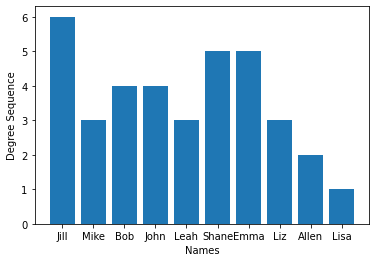

In [17]:
#we showed here the degree of sequence for each node.
plt.bar(Friends, degree_sequence)
plt.xlabel("Names")
plt.ylabel("Degree Sequence")

As we can see on the histogram Jill has the highest degree which is expected since they are the center of the network.

In [18]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plot_x = list(range(min_degree, max_degree + 1))

In [19]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

Text(0, 0.5, 'Counts')

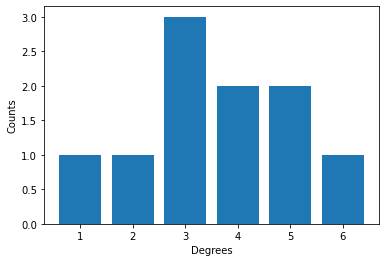

In [20]:
plt.bar(plot_x, plot_y)
plt.xlabel("Degrees")
plt.ylabel("Counts")

## In here we showed the Degree vs. Count, as we can see there are 3 nodes which had 3 degrees.

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In this part of the code we have to create the table for the information above, but since networkx has the functions for all of it, im jsut gonna discuss how to mannually compute for it.

1. Degree Centrality
--> The degree centrality, to define it in Leymann's term, it is simply the measure of how many alters an ego shares ties with. The logic is that those with more alters, compared to those with fewer, hold a more prominent place in the network.
    $$ C_{D} (j) = \sum_{j = 1}^{n} A_{ij}$$
2. Betweenness Centrality
--> The betweeness centrality basically asnwers the question "how many geodesic linkings between two actors j and k contain actor i?" It can be calculated using the equation:
$$ C_{B}(n_i) = \frac{\sum_{j < k}g_{jk} (n_i)}{g_{jk}}$$
3. Closeness Centrality
--> The closeness centrality basically answers the question "Who has the shortest distance to the other actors? ". It can be calculated using the equation:
$$C_{c}(n_i) = \frac{1}{\sum_{j=1}^{g} d(n_i,n_j)}$$

In [21]:
degree_centrality = nx.degree_centrality(Friends)
betweenness_centrality = nx.betweenness_centrality(Friends)
closeness_centrality = nx.closeness_centrality(Friends)

centrality_df = pd.DataFrame({
    'Name': list(Friends.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in Friends.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in Friends.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in Friends.nodes()]
})

print(centrality_df)

    Name  Degree Centrality  Betweenness Centrality  Closeness Centrality
0   Jill           0.666667                0.101852              0.600000
1   Mike           0.333333                0.000000              0.500000
2    Bob           0.444444                0.023148              0.529412
3   John           0.444444                0.023148              0.529412
4   Leah           0.333333                0.000000              0.500000
5  Shane           0.555556                0.231481              0.642857
6   Emma           0.555556                0.231481              0.642857
7    Liz           0.333333                0.388889              0.600000
8  Allen           0.222222                0.222222              0.428571
9   Lisa           0.111111                0.000000              0.310345


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

## Indentifying Communities

### Louvian Community detection algorithm

The equation for the Louvian modularity algorithm is given below, where:

* $A_{ij}$  is the adjacency matrix entry_
* $k_i$ and $k_j$ are the edges of nodes i and j.
* $m$ is the total number of edges in the network.
* $c_i$ and $c_j$ are the communities of nodes i and j.
* $\delta(c_i, c_j)$ is the Kronecker delta function.

I used the code from https://python-louvain.readthedocs.io/en/latest/ 

$$ Q = \frac{1}{2m} \sum_{ij} \big(A_{ij} - \gamma \frac{k_i k_j}{2m}\big) \delta(c_i, c_j)  $$

The following codes are based on Daffon's code.

The networkx library offers a function to perform the Louvain community detection algorithm on a specified network. Notably, this function includes the parameters "seed" and "resolution."

The "seed" parameter influences the algorithm's randomness by determining the random number generation, meaning different seeds can produce varying outcomes (though this is not guaranteed, given the inherent randomness).

The Louvain algorithm starts by assigning each node to its own community. It then iteratively moves each node to neighboring communities, seeking to maximize modularity. If merging nodes does not improve modularity, the nodes stay in their original communities.

In [24]:
for i in range(10): # iterate from 0 to 9
  print(nx.community.louvain_communities(Friends, seed=i, resolution=1)) # seed varies, resolution = 1 is constant

[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'Bob'}, {'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]


In [26]:
for i in range(10): # iterate from 0 to 9
  print(nx.community.louvain_communities(Friends, seed=1, resolution=1)) # seed constant, resolution = 1 is constant.

[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]
[{'Mike', 'Emma', 'Bob'}, {'Jill', 'John', 'Leah', 'Shane'}, {'Lisa', 'Allen', 'Liz'}]


As observed on the result varying seed gives us the same values. So a good wy to check other parameters that could affect this we can try varying the values of the resolution.

In [27]:
for i in range(10): # iterate from 0 to 9
  print(nx.community.louvain_communities(Friends, seed=i, resolution=0.8))

[{'Jill', 'John', 'Mike', 'Shane', 'Emma', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'John', 'Mike', 'Shane', 'Emma', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'John', 'Mike', 'Shane', 'Emma', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]
[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}]


As we lowered the value of the resolution the number of communities decreased. From this we can say that as we increase the value of the resolution we also increase the "requirements" in order to be included in a certain community.

In [30]:
l_com = nx.community.louvain_communities(Friends, seed=1, resolution=0.8) # finding the Louvain communities
l_mod = nx.community.modularity(Friends, l_com) # taking the final modularity of the network
print(l_mod)

0.16666666666666669


To check if our values are parallel to what is shown in other coomunity detection tools we used greedy_modularity_commnities to set the same resolution as the louvain and fromhere we can see that both has the same result

In [33]:
g_com = nx.community.greedy_modularity_communities(Friends, resolution=0.8) # finding the greedy modularity communities
g_mod = nx.community.modularity(Friends, g_com) # taking the final modularity of the network
print(g_mod)

0.16666666666666669


To further check if the communities were also the same we printed it out and yes the communities created were also the same.

In [34]:
print(l_com, "\n", g_com) # inspecting the communities created

[{'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}, {'Lisa', 'Allen', 'Liz'}] 
 [frozenset({'Jill', 'Mike', 'Emma', 'John', 'Shane', 'Leah', 'Bob'}), frozenset({'Lisa', 'Allen', 'Liz'})]


These results appear logical because the way the greedy_modularity_communities function operates is quite similar to the Louvain algorithm. Both start by assigning each node to its own community and then repeatedly merge pairs of communities that produce the greatest modularity increase until no further increase is possible. Additionally, the similar resolution settings I used may have contributed to these results.